<h1>Minst digit recognizer</h1>



## Loading Libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Flatten ,  Conv2D ,BatchNormalization ,MaxPool2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import plotly.graph_objects as go
from tensorflow.keras.models import Model
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
import itertools

In [19]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y = train["label"]
y = to_categorical(y, num_classes = 10)
X = train.drop(labels = ["label"],axis = 1) 


In [21]:

fig=px.histogram(train,x="label",color="label",labels="label")
fig.update_layout(bargap=0.2,width=700)

In [22]:
X.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

## Normalization

In [23]:
X = X/ 255.0
test = test / 255.0


In [24]:
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

## Spliting the data

In [25]:
X_train , X_test ,y_train ,y_test =train_test_split(X,y,test_size=0.1,random_state=0)

In [26]:

print(f"X_train shape {X_train.shape[0]}")
print(f"y train shape {y_train.shape[0]}")
print(f"X_test shape {X_test.shape[0]}")
print(f"y test shape {y_test.shape[0]}")

X_train shape 37800
y train shape 37800
X_test shape 4200
y test shape 4200


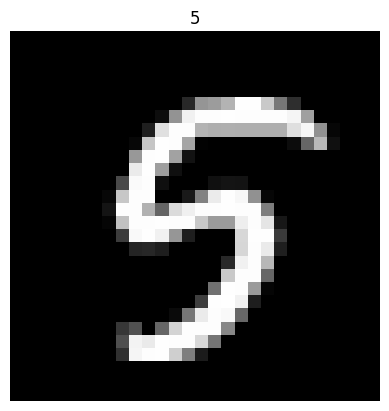

In [10]:
plt.imshow(X[8],cmap='gray')
plt.title(train.iloc[8,0])
plt.axis("off")
plt.show()

In [27]:

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [28]:
optimizer= Adam(lr=0.001,beta_1=0.9 ,beta_2=0.999)

In [29]:
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])


In [30]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [31]:
history = model.fit(datagen.flow(X_train,y_train, batch_size=250),
                              epochs = 1, validation_data = (X_test,y_test), steps_per_epoch=X_train.shape[0] )

  152/37800 [..............................] - ETA: 4:50:49 - loss: 0.5669 - accuracy: 0.8124WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 37800 batches). You may need to use the repeat() function when building your dataset.


37800/37800 [==============================] - 77s 2ms/step - loss: 0.5669 - accuracy: 0.8124 - val_loss: 0.0876 - val_accuracy: 0.9745


## Model Prediction

132/132 [==============================] - 3s 21ms/step


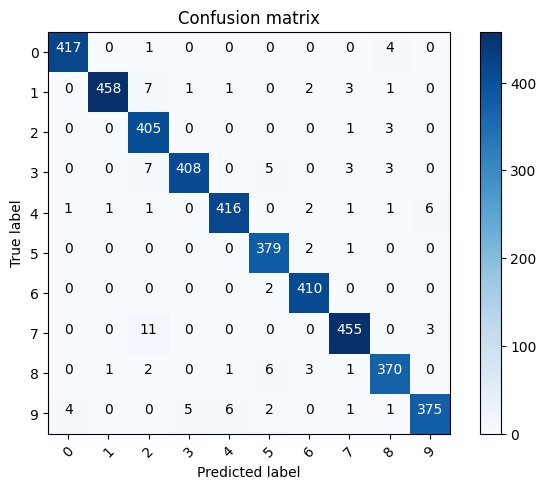

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

1/1 [==============================] - 0s 25ms/step


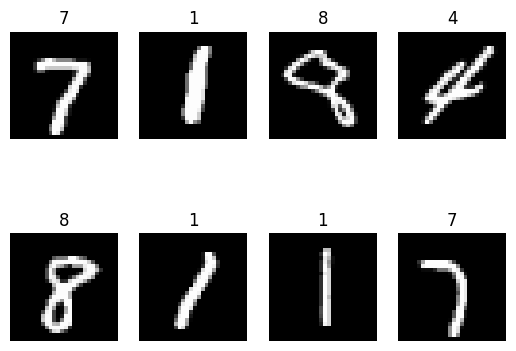

In [50]:
nrows=2
ncols=4
fig ,ax =plt.subplots(nrows,ncols)

for row in range(nrows):
    for col in range(ncols):
        rand=np.random.randint(1,1000)
        pred=model.predict(test[rand].reshape(-1,28,28,1))
        label=np.argmax(pred)
        ax[row,col].imshow(test[rand],cmap='gray')
        ax[row,col].set_title(label)
        ax[row,col].axis("off")


## The Prediction the model got it wrong

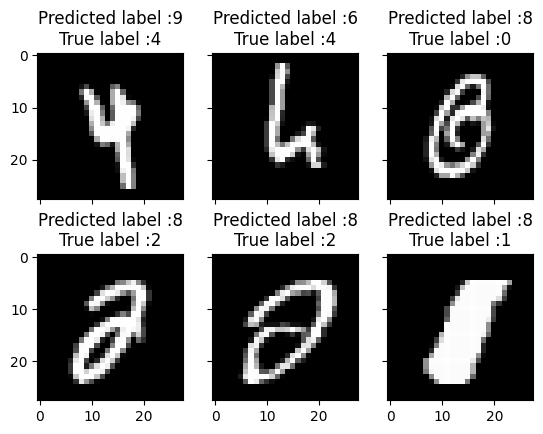

In [199]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)),cmap='gray')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [206]:
img= test[0].reshape(1,28,28,-1)
model.predict(img)

1/1 [==============================] - 0s 32ms/step


array([[1.5340516e-08, 1.2489421e-07, 9.9998939e-01, 6.2565286e-06,
        2.9641814e-10, 2.4866442e-10, 3.6526035e-10, 4.2110155e-06,
        3.2691464e-08, 1.5524565e-09]], dtype=float32)

200
